# Spotify Artist Recommendation Project

In this project, we will explore the [Spotify DataSet 1921-2020](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) from Kaggle and look to perform the following tasks:

* Time-series Analysis of song and artist trends over the years
* Create a *super* genres based on common audio characteristics
* Create a recommendation system for artists



Before we begin, we will import some libraries that we will use in the project as well as read in the data into pandas Dataframes.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import ast

%matplotlib inline

In [115]:
data = pd.read_csv('data/data.csv')

data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [117]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [118]:
genre = pd.read_csv('data/data_by_genres.csv')

genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


In [119]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            3232 non-null   object 
 1   acousticness      3232 non-null   float64
 2   danceability      3232 non-null   float64
 3   duration_ms       3232 non-null   float64
 4   energy            3232 non-null   float64
 5   instrumentalness  3232 non-null   float64
 6   liveness          3232 non-null   float64
 7   loudness          3232 non-null   float64
 8   speechiness       3232 non-null   float64
 9   tempo             3232 non-null   float64
 10  valence           3232 non-null   float64
 11  popularity        3232 non-null   float64
 12  key               3232 non-null   int64  
 13  mode              3232 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.6+ KB


In [120]:
artist_genre = pd.read_csv('data/data_w_genres.csv')

artist_genre.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [121]:
artist_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
 15  genres            32539 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

In [122]:
artist = pd.read_csv('data/data_by_artist.csv')

artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7


In [123]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32539 entries, 0 to 32538
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           32539 non-null  object 
 1   acousticness      32539 non-null  float64
 2   danceability      32539 non-null  float64
 3   duration_ms       32539 non-null  float64
 4   energy            32539 non-null  float64
 5   instrumentalness  32539 non-null  float64
 6   liveness          32539 non-null  float64
 7   loudness          32539 non-null  float64
 8   speechiness       32539 non-null  float64
 9   tempo             32539 non-null  float64
 10  valence           32539 non-null  float64
 11  popularity        32539 non-null  float64
 12  key               32539 non-null  int64  
 13  mode              32539 non-null  int64  
 14  count             32539 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.7+ MB


In [124]:
year = pd.read_csv('data/data_by_year.csv')

year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [125]:
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              102 non-null    int64  
 1   acousticness      102 non-null    float64
 2   danceability      102 non-null    float64
 3   duration_ms       102 non-null    float64
 4   energy            102 non-null    float64
 5   instrumentalness  102 non-null    float64
 6   liveness          102 non-null    float64
 7   loudness          102 non-null    float64
 8   speechiness       102 non-null    float64
 9   tempo             102 non-null    float64
 10  valence           102 non-null    float64
 11  popularity        102 non-null    float64
 12  key               102 non-null    int64  
 13  mode              102 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.3 KB


We see that the artist and artist_genre dataframes are basically the same from first glance, with the artist_genre simply having a genre column at the end of the artist dataframe. Therefore, we will use the artist_genre dataframe for our analysis and ignore the artist dataframe. 

#### Data Feature first glance

We see that the *data* dataframe contains the majority of the information including the artists, songs, audio information, and time of release among a few other features. What this dataframe is lacking that is in our other dataframes is the genre, given in both *genre* or *artist* dataframes.

In order to create a proper recommendation system, we will need to narrow down our feature list to those that we imagine will be useful. Additionally, we will need to create a way of finding similar artists, genres, or songs based on previous listening history.

We will start this process by defining a few functions that will help with this information gathering process.

In [126]:
data['artists'] = data['artists'].str.replace('"', '').str.replace("'","")


In [127]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,[Mamie Smith],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,[Screamin Jay Hawkins],0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,[Mamie Smith],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,[Oscar Velazquez],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,[Mixe],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


### Exploring the data

We will now have an introductory look at the data, seeing what we can parse from the different features in each data set.

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

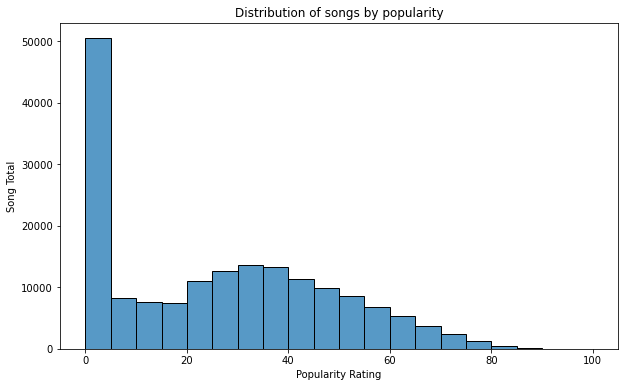

In [183]:
# Create a histogram for popularity distributed such that popularity is > 0
plt.figure(figsize=(10,6))
sns.histplot(data['popularity'], bins=20)

plt.title('Distribution of songs by popularity')
plt.xlabel("Popularity Rating")
plt.ylabel("Song Total")

plt.savefig('images/popularity_dist.png')

We see, without including songs with a 0 popularity, that the majority are rated just below 40 in popularity, with very few songs above 80 in total popularity. Those songs that do end up in the top 10 of most popular are:

In [130]:
data.sort_values('popularity', ascending=False)[['artists', 'name', 'year','popularity']].head(10)

,artists,name,year,popularity
20062,[Olivia Rodrigo],drivers license,2021,100
19862,"[24kGoldn, iann dior]",Mood (feat. iann dior),2020,96
19866,[Ariana Grande],positions,2020,96
19886,"[Bad Bunny, Jhay Cortez]",DÁKITI,2020,95
19976,[KAROL G],BICHOTA,2020,95
19868,[Ariana Grande],34+35,2020,94
19870,[CJ],Whoopty,2020,94
19872,[The Kid LAROI],WITHOUT YOU,2020,94
19876,[Billie Eilish],Therefore I Am,2020,94
19928,"[Bad Bunny, ROSALÍA]",LA NOCHE DE ANOCHE,2020,94


Each song that is in our top 10 falls in 2020, excepting only the top song, which is from 2021. We expect this, since most people have only recently started listening to Spotify and, therefore, newer songs would prove to be more popular.

Let's have a look at the breakdown of popularity averages for each decade of all songs.

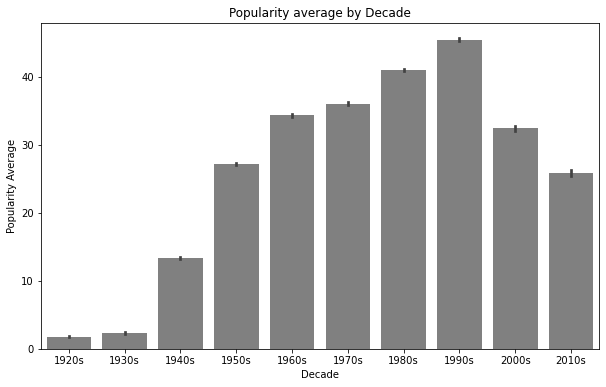

In [181]:
data['decade'] = pd.qcut(data['year'],10)
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='decade', y='popularity', data=data, color='gray')
labels=['1920s','1930s','1940s', '1950s','1960s', '1970s', '1980s', '1990s','2000s', '2010s']

plt.title('Popularity average by Decade')
plt.xlabel('Decade')
plt.ylabel('Popularity Average')
_ = ax.set_xticklabels(labels)

plt.savefig('images/popularity_decade_1.png')

We can see that the average popularity steadily increases until the 1990s, then drops off for songs published after 2000. This can likely be explained by the overall volume of songs in the data for each decade. 

To simplify, we would expect songs from the 1990s (millenial favorites) to have high popularity, while some more obscure music from the era to not make it into the database. Compare this to songs that are released in the last 20 years. We should expect have a much higher volume of songs making it onto Spotify, meaning the overall average popularity of these two decades to be lower. If we eliminated songs with 0 popularity, we would expect the 2000s and 2010s to be similar or higher than the 1990s.

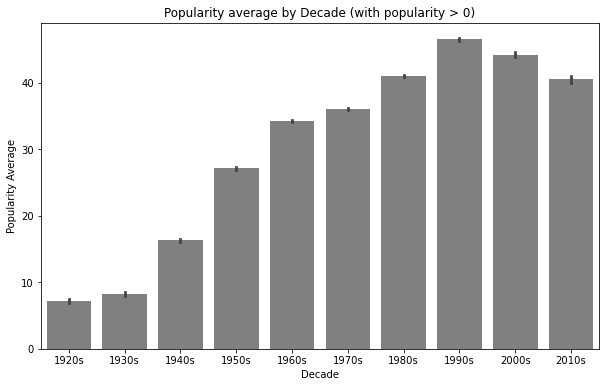

In [180]:
data['decade'] = pd.qcut(data['year'],10)
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='decade', y='popularity', data=data[data['popularity']>0], color='gray')
labels=['1920s','1930s','1940s', '1950s','1960s', '1970s', '1980s', '1990s','2000s', '2010s']

plt.title('Popularity average by Decade (with popularity > 0)')
plt.xlabel('Decade')
plt.ylabel('Popularity Average')
_ = ax.set_xticklabels(labels)

plt.savefig('images/popularity_decade_2.png')

Next, we will explore the tempo for each decade, and see how music has evolved in average speed of songs.

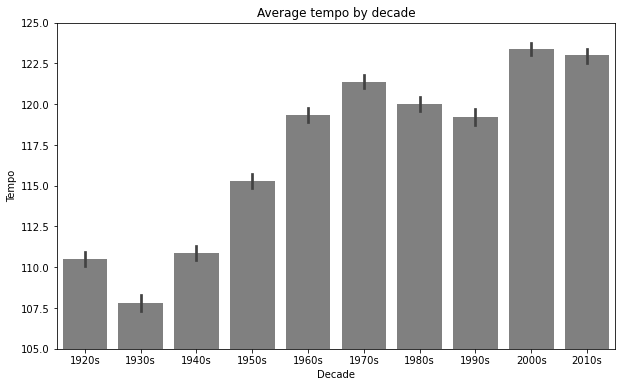

In [179]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(x='decade', y='tempo', data=data, color='gray', estimator=np.average)
labels=['1920s','1930s','1940s', '1950s','1960s', '1970s', '1980s', '1990s','2000s', '2010s']

plt.title('Average tempo by decade')
plt.xlabel('Decade')
plt.ylabel('Tempo')
plt.ylim(105,125)
_ = ax.set_xticklabels(labels)

plt.savefig('images/tempo_decade.png')

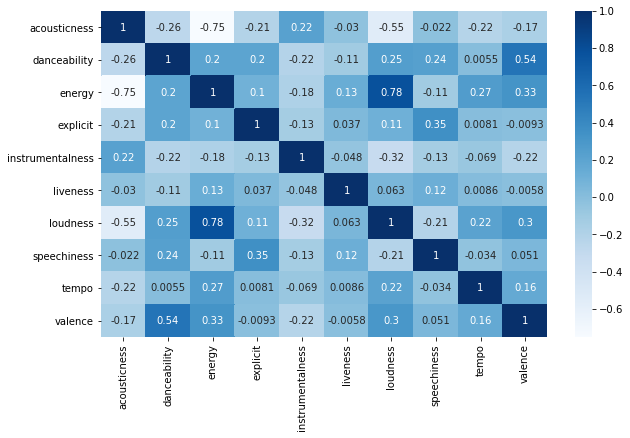

In [178]:
corr = data[['acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Blues')

plt.savefig('images/sound_heatmap.png')

Having a look at the correlation heatmap, we see a few observations that we would expect.

* Loudness and energy are positively correlated
* Acousticness is negatively correlated with energy and loudness
* Danceability and valence (positivity or happiness in the song) are somewhat correlated

These observations should make sense. For example, higher energy songs also tend to be louder. In contrast, any song that is more acoustic probably is not heavy with percussion, so would likely lack some of the loudness and energy that a drum would provide. It is interesting to associate dancing and the happiness level of the song, however. On the flip side, there doesn't seem to be any direct relationship with happiness and explicity of the songs, meaning that more mature songs tend to be of a mixed emotional range.

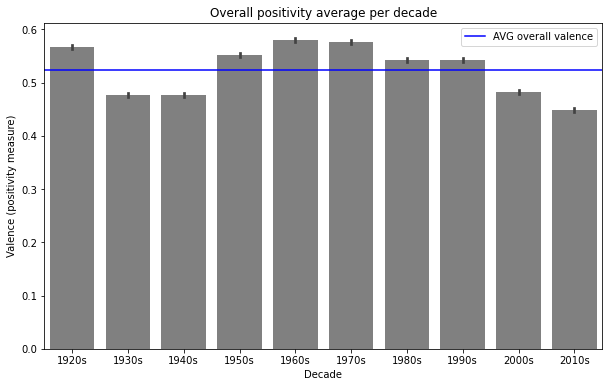

In [177]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(y='valence', x='decade', data=data, color='gray')


plt.axhline(data['valence'].mean(), color='blue', label='AVG overall valence')
plt.legend()

_ = ax.set_xticklabels(labels=labels)

plt.title('Overall positivity average per decade')
plt.xlabel('Decade')
plt.ylabel('Valence (positivity measure)')

plt.savefig('images/valence_decade.png')

When comparing the "positivity" track over the decades, we find that the happiness in the tracks was highest in the 20s, 60s and 70s, while it has steadily declined after the millenium. We see that times with more economic strife (30-40s and 2000-2010s) are lower in overall happiness and relative financial prosperity (20s and 50-90s) have higher overall happiness in the songs of those eras.

We now will look at how positivity and explicity are actually related. First we will show the difference in songs that are and are not considered explicit.

In [140]:
data.groupby('explicit')['explicit'].count()

explicit
0    162507
1     11882
Name: explicit, dtype: int64

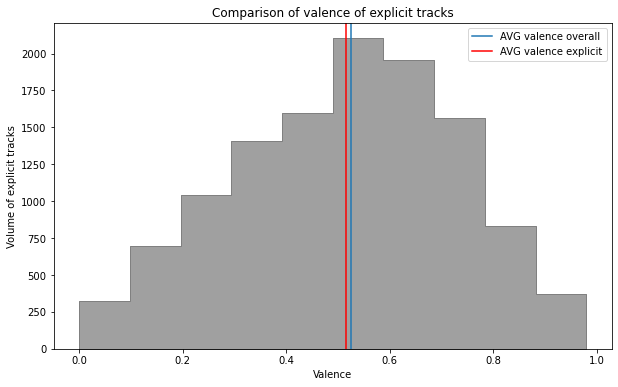

In [166]:
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(x='valence', data=data[data['explicit']==1], bins=10, color='gray', element='step')

plt.axvline(x=data['valence'].mean())
plt.axvline(x=data[data['explicit']==1]['valence'].mean(), color='red')

vline = ['AVG valence overall', 'AVG valence explicit']

plt.legend(vline)

plt.title('Comparison of valence of explicit tracks')
plt.xlabel('Valence')
plt.ylabel('Volume of explicit tracks')

plt.savefig('images/valence_explicit.png')

If we focus on the 11K+ songs that are listed as explicit, what we find is that explicit songs tend to be similar to nonexplicit songs, with the averages being almost identical. equally, there seem to more explicit songs just above the average valence than just below, while the extremes are relatively similar.

#### Functions for artist recommendations

In [14]:
# Borrowed this function from another notebook in order to evaluate the artists collaboration 
def get_collab(artist):
    # function to flatten the list of artists in the artists column of data 
    flatten = lambda l: [item for sublist in l for item in sublist]
    # creates a unique list of all artists in the artists column minus the artist being evaluated
    artists, counts = np.unique([i for i in 
                      flatten([eval(x) for x in data[data['artists'].str.contains(artist)]
                      ['artists']]) if i != artist], return_counts=True)
    # If no artist collaboration, return empty list
    if len(artists) == 0:
        return []
    # Creates a count based on the highest collaboration total. The top collaborator has a value of 1.0
    counts = counts / np.max(counts)
    # Sorts the collaborators by their count percentage with relation to the maximum collaborator
    indices = np.argsort(counts)
    return list(zip(artists[indices[::-1]], counts[indices[::-1]]))

In [15]:
def get_genre(a):
    return artist[artist['artists']==a]['genres'].to_numpy()[0]

In [16]:
def get_artist_w_genre(a):
    genres = ast.literal_eval(get_genre(a))
    artist_list = []
    for g in genres:
        artist_list += artist[artist['genres'].str.contains('\'' + g + '\'')]['artists'].to_list()
    if len(artist_list) == 0:
        return []
    artists, counts = np.unique(artist_list, return_counts=True)
    counts = counts / np.max(counts)
    indices = np.argsort(counts)
    return list(zip(artists[indices[::-1]], counts[indices[::-1]]))